In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Important functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# LOADING DATA

In [2]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Starting 

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.isnull().sum()         #checking for any missing values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.shape

(299, 13)

<AxesSubplot:>

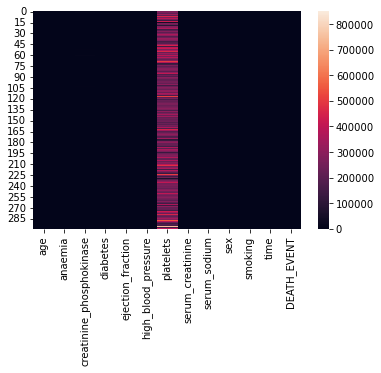

In [6]:
sns.heatmap(df)

In [7]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

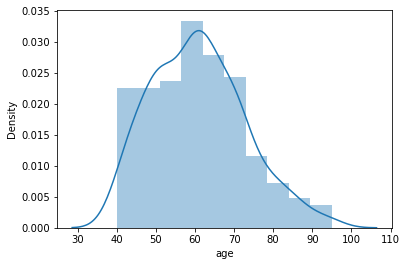

In [8]:
sns.distplot(df["age"])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='serum_sodium', ylabel='Density'>

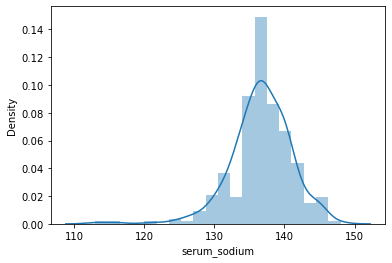

In [9]:
sns.distplot(df['serum_sodium'])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time', ylabel='Density'>

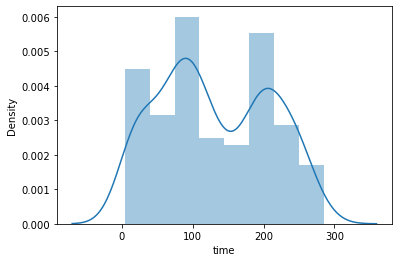

In [10]:
sns.distplot(df['time'])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ejection_fraction', ylabel='Density'>

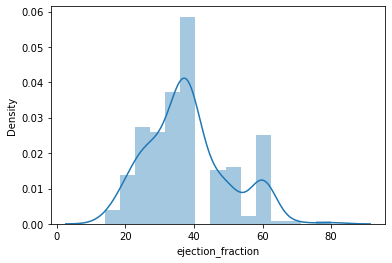

In [11]:
sns.distplot(df['ejection_fraction'])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Density'>

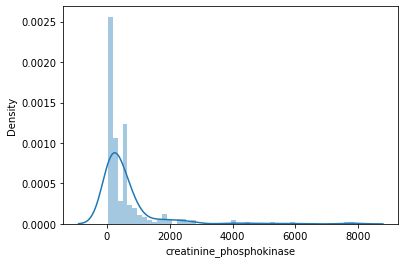

In [12]:
sns.distplot(df["creatinine_phosphokinase"])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='platelets', ylabel='Density'>

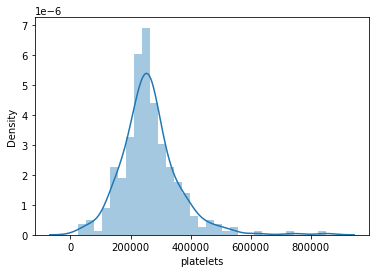

In [13]:
sns.distplot(df['platelets'])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='serum_creatinine', ylabel='Density'>

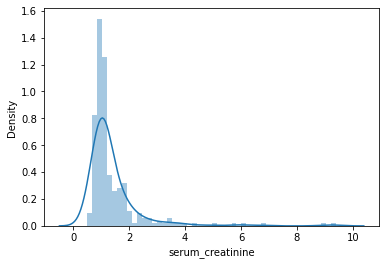

In [14]:
sns.distplot(df['serum_creatinine'])

In [15]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
# transformer1=FunctionTransformer(np.x^2)
q=np.array(df['age'])
df['age']=transformer.transform(q)
q_1=np.array(df['creatinine_phosphokinase'])
df['creatinine_phosphokinase']=transformer.transform(q_1)
df['platelets']=transformer.transform(df['platelets'])
df['serum_creatinine']=transformer.transform(df["serum_creatinine"])
df['ejection_fraction']=transformer.transform(df["ejection_fraction"])
df['time']=transformer.transform(df["time"])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

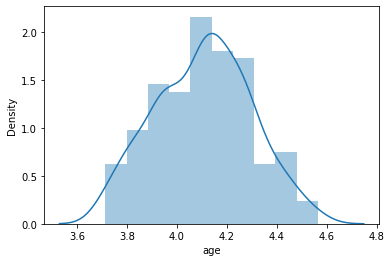

In [16]:
sns.distplot(df["age"])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Density'>

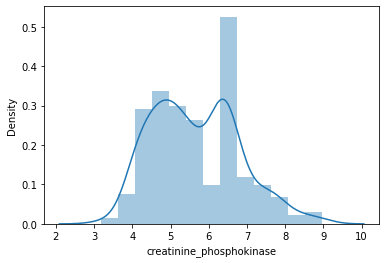

In [17]:
sns.distplot(df["creatinine_phosphokinase"])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ejection_fraction', ylabel='Density'>

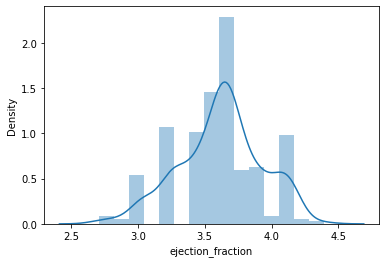

In [18]:
sns.distplot(df['ejection_fraction'])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='platelets', ylabel='Density'>

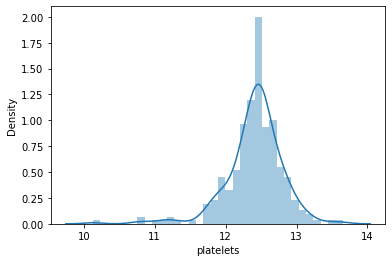

In [19]:
sns.distplot(df['platelets'])

/usr/lib/python3/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='serum_creatinine', ylabel='Density'>

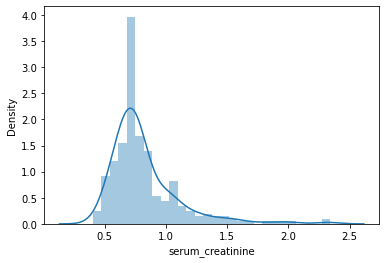

In [20]:
sns.distplot(df['serum_creatinine'])

In [21]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,4.330733,0,6.368187,0,3.044522,1,12.487489,1.064711,130,1,0,1.609438,1
1,4.025352,0,8.969796,0,3.663562,0,12.481274,0.741937,136,1,0,1.945910,1
2,4.189655,0,4.990433,0,3.044522,0,11.995358,0.832909,129,1,1,2.079442,1
3,3.931826,1,4.718499,0,3.044522,0,12.254868,1.064711,137,1,0,2.079442,1
4,4.189655,1,5.081404,1,3.044522,0,12.697719,1.308333,116,0,0,2.197225,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,4.143135,0,4.127134,1,3.663562,1,11.951187,0.741937,143,1,1,5.602119,0
295,4.025352,0,7.507141,0,3.663562,0,12.506181,0.788457,139,0,0,5.605802,0
296,3.828641,0,7.630947,1,4.110874,0,13.517106,0.587787,138,0,0,5.631212,0
297,3.828641,0,7.789040,0,3.663562,0,11.849405,0.875469,140,1,1,5.638355,0


In [22]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.093535,-0.101857,-0.087351,0.064328,0.099725,-0.063177,0.211679,-0.041371,0.059936,0.024045,-0.216776,0.240452
anaemia,0.093535,1.000000,-0.224335,-0.012729,0.019511,0.038182,-0.030928,0.025954,0.041882,-0.094769,-0.107290,-0.137736,0.066270
creatinine_phosphokinase,-0.101857,-0.224335,1.000000,0.034366,-0.055524,-0.079990,-0.007407,-0.066970,0.019014,0.031048,-0.025148,0.099913,0.032048
diabetes,-0.087351,-0.012729,0.034366,1.000000,0.007510,-0.012732,0.067189,-0.034161,-0.089551,-0.157730,-0.147173,0.039429,-0.001943
ejection_fraction,0.064328,0.019511,-0.055524,0.007510,1.000000,0.013841,0.070136,-0.097900,0.197897,-0.139823,-0.058342,0.126711,-0.316748
high_blood_pressure,0.099725,0.038182,-0.079990,-0.012732,0.013841,1.000000,0.091347,-0.041463,0.037109,-0.104615,-0.055711,-0.167586,0.079351
platelets,-0.063177,-0.030928,-0.007407,0.067189,0.070136,0.091347,1.000000,-0.064821,0.047839,-0.124310,0.024176,0.002739,-0.068179
serum_creatinine,0.211679,0.025954,-0.066970,-0.034161,-0.097900,-0.041463,-0.064821,1.000000,-0.245464,0.023771,-0.036524,-0.207188,0.346136
serum_sodium,-0.041371,0.041882,0.019014,-0.089551,0.197897,0.037109,0.047839,-0.245464,1.000000,-0.027566,0.004813,0.146592,-0.195204
sex,0.059936,-0.094769,0.031048,-0.157730,-0.139823,-0.104615,-0.124310,0.023771,-0.027566,1.000000,0.445892,-0.030295,-0.004316


In [23]:
df.drop(columns=['ejection_fraction'])

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,4.330733,0,6.368187,0,1,12.487489,1.064711,130,1,0,1.609438,1
1,4.025352,0,8.969796,0,0,12.481274,0.741937,136,1,0,1.945910,1
2,4.189655,0,4.990433,0,0,11.995358,0.832909,129,1,1,2.079442,1
3,3.931826,1,4.718499,0,0,12.254868,1.064711,137,1,0,2.079442,1
4,4.189655,1,5.081404,1,0,12.697719,1.308333,116,0,0,2.197225,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,4.143135,0,4.127134,1,1,11.951187,0.741937,143,1,1,5.602119,0
295,4.025352,0,7.507141,0,0,12.506181,0.788457,139,0,0,5.605802,0
296,3.828641,0,7.630947,1,0,13.517106,0.587787,138,0,0,5.631212,0
297,3.828641,0,7.789040,0,0,11.849405,0.875469,140,1,1,5.638355,0


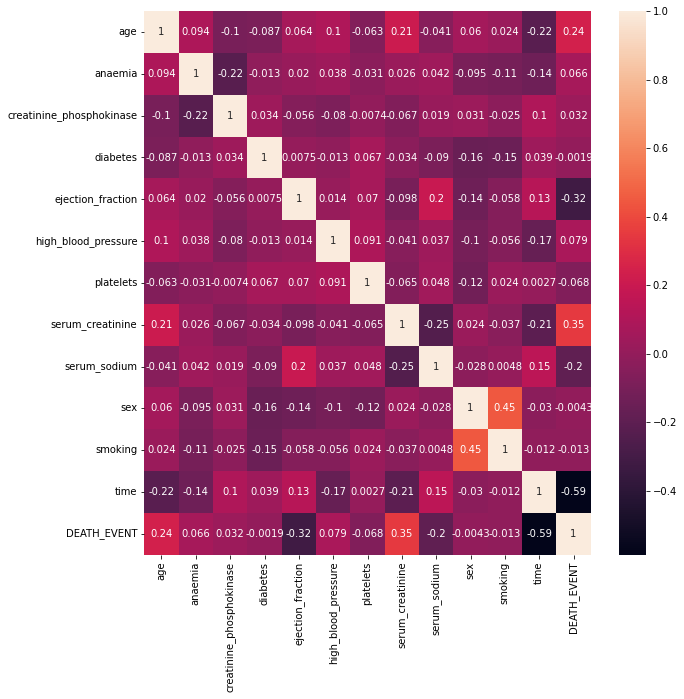

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

In [25]:
#Seperating Response Variable from the dataset
X=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']

In [26]:
#train_test_split()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=2)

In [27]:
#Models
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('DT',DecisionTreeClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier()))

In [28]:
#Evaluation of models
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=20)#random_state=1
    cv_results=cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))


LR: 0.820455 (0.132350)
DT: 0.726136 (0.127765)
LDA: 0.825379 (0.120487)
KNN: 0.709091 (0.138191)
NB: 0.794318 (0.125750)
SVM: 0.754167 (0.128240)
RFC: 0.794318 (0.140290)


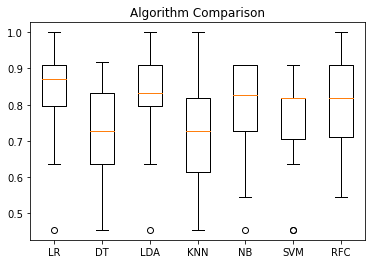

In [29]:
#Compare our models
plt.boxplot(results,labels=names)
plt.title("Algorithm Comparison")
plt.show()


In [30]:
#Logistic Regression Classifier
lrc = LogisticRegression(solver='liblinear',multi_class='ovr')
lrc.fit(X_train,y_train)
pred_y=lrc.predict(X_val)

#Accuracy
print('Accuracy of the LRC:',accuracy_score(y_val.values,pred_y)*100,"%")

Accuracy of the LRC: 89.33333333333333 %


In [31]:
#Random Forest Classifier 
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_y=rf.predict(X_val)

#Accuracy
print('Accuracy of the RFC:',accuracy_score(y_val.values,pred_y)*100,"%")

Accuracy of the RFC: 93.33333333333333 %


In [32]:
#KNeighbors Classifier
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
pred_y=knc.predict(X_val)

#Accuracy
print('Accuracy of the KNC:',accuracy_score(y_val.values,pred_y)*100,"%")

Accuracy of the KNC: 85.33333333333334 %


In [33]:
#Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
pred_y=lda.predict(X_val)

#Accuracy
print('Accuracy of the LDA:',accuracy_score(y_val.values,pred_y)*100,"%")

Accuracy of the LDA: 90.66666666666666 %


In [34]:
#GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
pred_y=nb.predict(X_val)

#Accuracy
print('Accuracy of the NB:',accuracy_score(y_val.values,pred_y)*100,"%")

Accuracy of the NB: 89.33333333333333 %
